# Rapid EDA 2.3 - Flavors of Cacao
---

In [22]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

From the kaggle page for this dataset:

> Flavors of Cacao Rating System:
>
> 5= Elite (Transcending beyond the ordinary limits)
>
> 4= Premium (Superior flavor development, character and style)
>
> 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
>
> 2= Disappointing (Passable but contains at least one significant flaw)
>
> 1= Unpleasant (mostly unpalatable)

In [23]:
cacao = pd.read_csv('data/flavors_of_cacao.csv')

In [24]:
cacao.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [25]:
cacao.rename(lambda name: name.replace('\n', ' '), axis=1, inplace=True)
cacao.columns

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')

In [26]:
column_names = {
    "Company\xa0 (Maker-if known)":"company",
    "Specific Bean Origin or Bar Name":"bean_origin_bar_name",
    "REF":"ref",
    "Review Date":"review_date",
    "Cocoa Percent":"cocoa_percent",
    "Company Location":"company_location",
    "Rating":"rating",
    "Bean Type":"bean_type",
    "Broad Bean Origin":"broad_bean_origin"
}

In [27]:
try:
    cacao.rename(column_names, axis=1, inplace=True)
except:
    print("Column name preprocessing complete")

cacao.columns

Index(['company', 'bean_origin_bar_name', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_bean_origin'],
      dtype='object')

In [28]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               1795 non-null   object 
 1   bean_origin_bar_name  1795 non-null   object 
 2   ref                   1795 non-null   int64  
 3   review_date           1795 non-null   int64  
 4   cocoa_percent         1795 non-null   object 
 5   company_location      1795 non-null   object 
 6   rating                1795 non-null   float64
 7   bean_type             1794 non-null   object 
 8   broad_bean_origin     1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [29]:
cacao_clean = cacao.dropna()

In [30]:
cacao_clean['cocoa_percent'] = cacao_clean['cocoa_percent'].map(lambda x: float(x.strip("%")))

<ipython-input-30-7870300abe2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacao_clean['cocoa_percent'] = cacao_clean['cocoa_percent'].map(lambda x: float(x.strip("%")))


In [31]:
cacao_clean['bean_type'] = np.where(cacao_clean['bean_type'] == '\xa0|\s', 'Unknown', cacao_clean['bean_type'])

<ipython-input-31-c00f02f206f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacao_clean['bean_type'] = np.where(cacao_clean['bean_type'] == '\xa0|\s', 'Unknown', cacao_clean['bean_type'])


In [32]:
cacao_clean['bean_type'].unique()

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [33]:
cacao.describe()

,ref,review_date,rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [34]:
cacao.describe(include="O")

,company,bean_origin_bar_name,cocoa_percent,company_location,bean_type,broad_bean_origin
count,1795,1795,1795,1795,1794,1794
unique,416,1039,45,60,41,100
top,Soma,Madagascar,70%,U.S.A.,,Venezuela
freq,47,57,672,764,887,214


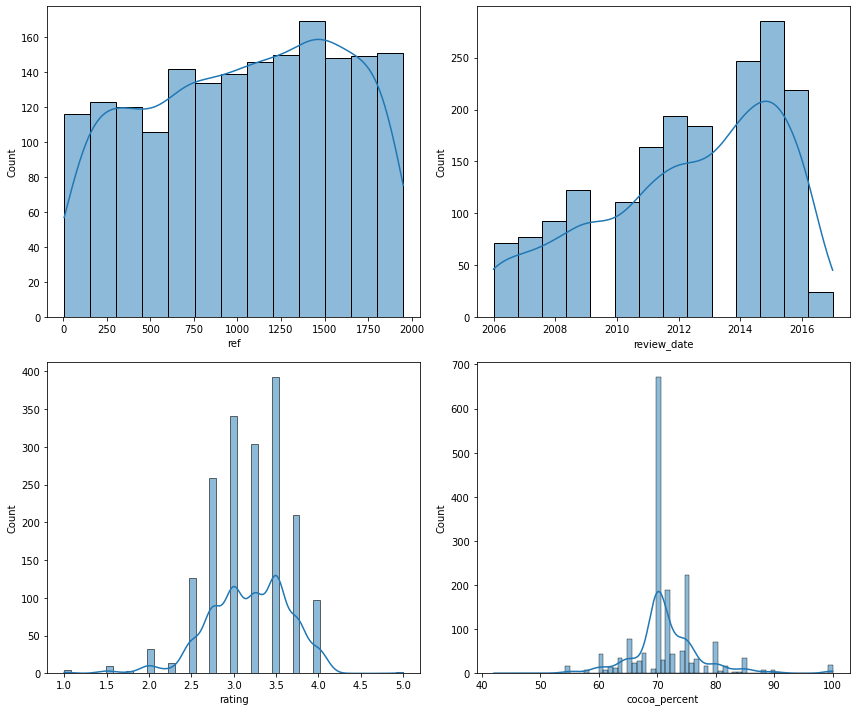

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
n = 0
for col in ['ref', 'review_date', 'rating', 'cocoa_percent']:
    sns.histplot(data=cacao_clean, x=col, ax=ax[n // 2, n % 2], kde=True)
    n += 1
plt.tight_layout();

<Axes: xlabel='company', ylabel='count'>

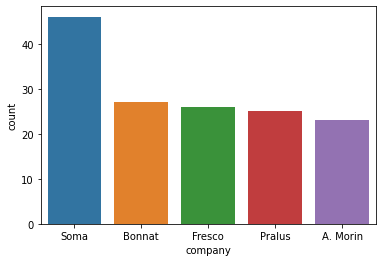

In [36]:
sns.barplot(x=cacao_clean['company'].value_counts(ascending=False)[:5].index, y=cacao_clean['company'].value_counts(ascending=False)[:5])

<Axes: xlabel='company', ylabel='rating'>

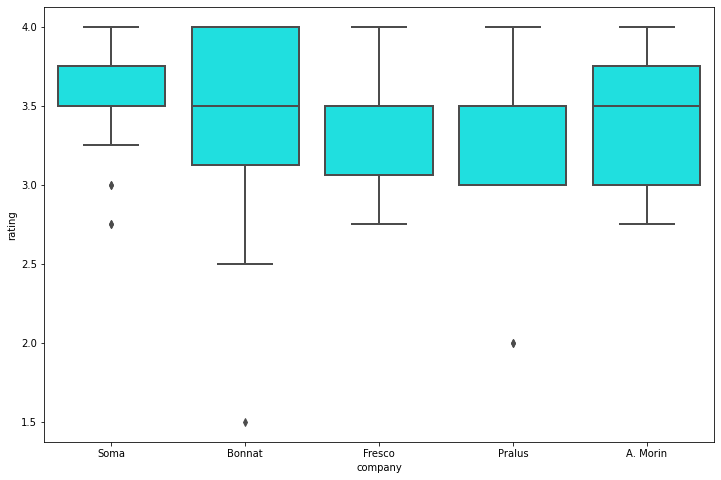

In [37]:
SOMA = cacao_clean.loc[cacao_clean['company'] == "Soma", ["company", "rating"]]
BONNAT = cacao_clean.loc[cacao_clean['company'] == "Bonnat", ["company", "rating"]]
FRESCO = cacao_clean.loc[cacao_clean['company'] == "Fresco", ["company", "rating"]]
PRALUS = cacao_clean.loc[cacao_clean['company'] == "Pralus", ["company", "rating"]]
A_MORIN = cacao_clean.loc[cacao_clean['company'] == "A. Morin", ["company", "rating"]]

most_frequent_companies = pd.concat([SOMA, BONNAT, FRESCO, PRALUS, A_MORIN])

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(
    x="company",
    y="rating",
    data=most_frequent_companies,
    ax=ax,
    color='aqua', 
    linewidth=2
)

#### Are the average ratings across the top 5 most occurring companies statistically different?

In [38]:
# We want to have a confidence level of 99%
alpha = 0.01

soma = cacao_clean.loc[cacao_clean['company'] == "Soma", "rating"]
bonnat = cacao_clean.loc[cacao_clean['company'] == "Bonnat", "rating"]
fresco = cacao_clean.loc[cacao_clean['company'] == "Fresco", "rating"]
pralus = cacao_clean.loc[cacao_clean['company'] == "Pralus", "rating"]
a_morin = cacao_clean.loc[cacao_clean['company'] == "A. Morin", "rating"]

company_groups = {'soma':soma, 'bonnat':bonnat, 'fresco':fresco,
          'pralus':pralus, 'a_morin':a_morin}

result = stats.f_oneway(*company_groups.values())
f_stat, p = result
# Printing out the result just to show what it looks like
result

F_onewayResult(statistic=2.1418386449350257, pvalue=0.0787062238968593)

Since our p-value ($0.07$) is greater than our predetermined $\alpha$ value of $0.01$, we cannot reject the null hypothesis that the mean rating of each of these 5 groups is the same.

#### Is there a significant difference in average ratings across the top 5 most occurring bean countries of origin?

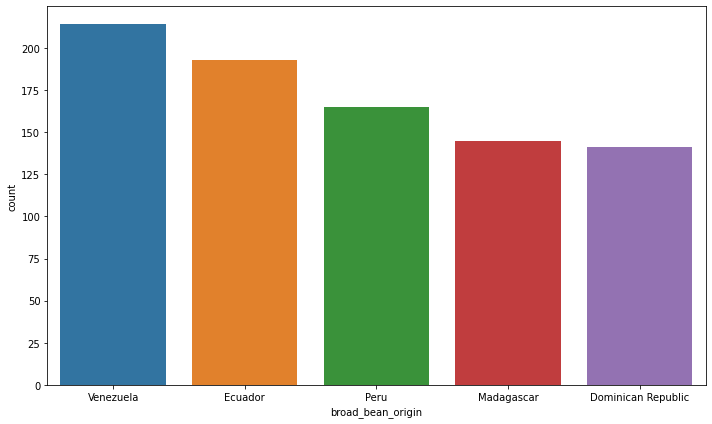

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=cacao_clean['broad_bean_origin'].value_counts(ascending=False)[:5].index, y=cacao_clean['broad_bean_origin'].value_counts(ascending=False)[:5])
plt.tight_layout()

<Axes: xlabel='broad_bean_origin', ylabel='rating'>

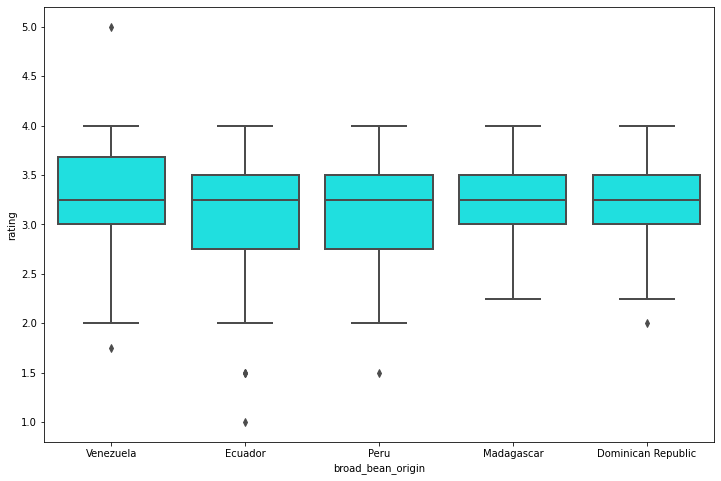

In [40]:
VENEZUELA = cacao_clean.loc[cacao_clean['broad_bean_origin'] == "Venezuela", ["broad_bean_origin", "rating"]]
ECUADOR = cacao_clean.loc[cacao_clean['broad_bean_origin'] == "Ecuador", ["broad_bean_origin", "rating"]]
PERU = cacao_clean.loc[cacao_clean['broad_bean_origin'] == "Peru", ["broad_bean_origin", "rating"]]
MADAGASCAR = cacao_clean.loc[cacao_clean['broad_bean_origin'] == "Madagascar", ["broad_bean_origin", "rating"]]
DOM_REP = cacao_clean.loc[cacao_clean['broad_bean_origin'] == "Dominican Republic", ["broad_bean_origin", "rating"]]

most_frequent_countries = pd.concat([VENEZUELA, ECUADOR, PERU, MADAGASCAR, DOM_REP])

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(
    x="broad_bean_origin",
    y="rating",
    data=most_frequent_countries,
    ax=ax,
    color='aqua', 
    linewidth=2
)

We can probably already guess that the means are not going to be significantly different based on this boxplot alone.

In [41]:
venezuela = VENEZUELA['rating']
ecuador = ECUADOR['rating']
peru = PERU['rating']
madagascar = MADAGASCAR['rating']
dominican_republic = DOM_REP['rating']

In [42]:
country_groups = {'venezuela':venezuela, 'ecuador':ecuador, 'peru':peru,
                'madagascar':madagascar, 'dominican_republic':dominican_republic}

result = stats.f_oneway(*country_groups.values())
f_stat, p = result

result

F_onewayResult(statistic=2.757823250197233, pvalue=0.02686459416755213)

Similarly to the 5 most frequent companies, we fail to reject the null hypothesis that there is a significant difference in average rating across the 5 most frequent bean countries of origin.